Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Importing the dataset

In [2]:
data = pd.read_csv("D:\\SEMO\\Data Mining\\Final_Project\\Life Expectancy Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2347,Slovenia,2013,Developed,85.0,78.0,0,9.53,259.778679,NaN,1,...,95.0,9.29,95.0,0.1,2315.317990,259953.0,1.4,1.4,0.878,16.8
90,Argentina,2005,Developing,74.9,127.0,11,7.53,96.166534,88.0,0,...,95.0,6.85,98.0,0.1,576.883829,39145488.0,1.1,1.0,0.780,16.3
2482,Suriname,2006,Developing,69.3,199.0,0,4.52,72.800168,84.0,0,...,84.0,6.22,84.0,0.6,527.920000,5437.0,3.5,3.4,0.678,11.5
363,Brazil,2004,Developing,72.0,17.0,81,6.85,186.609049,96.0,0,...,99.0,7.70,99.0,0.1,3623.476670,184738458.0,3.2,3.2,0.695,14.0
2293,Seychelles,2003,Developing,72.1,185.0,0,7.41,843.118666,99.0,0,...,99.0,4.64,99.0,0.1,8524.961236,82781.0,6.1,6.5,0.713,12.1
1230,Iran (Islamic Republic of),2003,Developing,75.0,154.0,29,0.01,0.000000,98.0,11644,...,99.0,5.42,99.0,0.1,NaN,NaN,7.5,7.7,0.679,11.8
468,Cambodia,2011,Developing,67.0,19.0,13,2.12,60.185918,88.0,722,...,87.0,5.64,88.0,0.3,882.491462,14537886.0,11.0,11.2,0.533,10.7
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.998580,91.0,199,...,92.0,9.36,92.0,0.1,67677.634770,22728254.0,0.6,0.6,0.930,20.1
2688,Turkey,2008,Developing,73.5,121.0,25,1.39,22.672718,92.0,0,...,96.0,6.70,96.0,0.1,185.689750,74432.0,5.0,4.8,0.705,12.5
28,Albania,2003,Developing,72.8,18.0,1,4.29,14.719289,97.0,8,...,97.0,6.27,97.0,0.1,189.681557,339616.0,1.9,2.0,0.674,10.7


Correcting the column names 

In [4]:
column = data.columns.to_list()
column

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [5]:
data.columns = data.columns.str.strip()



In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Handling the missing data

In [7]:
missing_data = pd.DataFrame(data.isnull().sum(), columns = ['missing'])
missing_data

,missing
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
numeric_data = data.select_dtypes(include=[np.number])


In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)


In [10]:
non_numeric_data = data.select_dtypes(exclude=[np.number])
data = pd.concat([non_numeric_data, data_imputed], axis=1)


In [11]:
missing_data_after = pd.DataFrame(data.isnull().sum(), columns=['missing_after'])
missing_data_after


,missing_after
Country,0
Status,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


Encoding categorial data

In [12]:
# Identify all data types in the DataFrame
data_types = data.dtypes.unique()

# List of data types to include (all types except numeric and boolean)
include_types = [dtype for dtype in data_types if not np.issubdtype(dtype, np.number) and not np.issubdtype(dtype, np.bool_)]

# Select columns of these types and sample 5 rows
non_numeric_non_boolean_sample = data.select_dtypes(include=include_types).sample(5)
non_numeric_non_boolean_sample


,Country,Status
858,Eritrea,Developing
2540,Syrian Arab Republic,Developing
1992,Paraguay,Developing
523,Central African Republic,Developing
526,Central African Republic,Developing


In [13]:
country_unique_count = len(data['Country'].unique())
status_unique_count = len(data['Status'].unique())

print(f'Unique:\n\nCountry: {country_unique_count}\nStatus: {status_unique_count}')


Unique:

Country: 193
Status: 2


In [14]:
country_dummy = pd.get_dummies(data['Country'], drop_first = True)
status_dummy = pd.get_dummies(data['Status'], drop_first = True)

In [15]:
data.drop(['Country', 'Status'], inplace = True, axis = 1)

In [16]:
corr_data = data.copy()

Correlation Matrix

In [17]:
correlation_matrix = corr_data.corr()

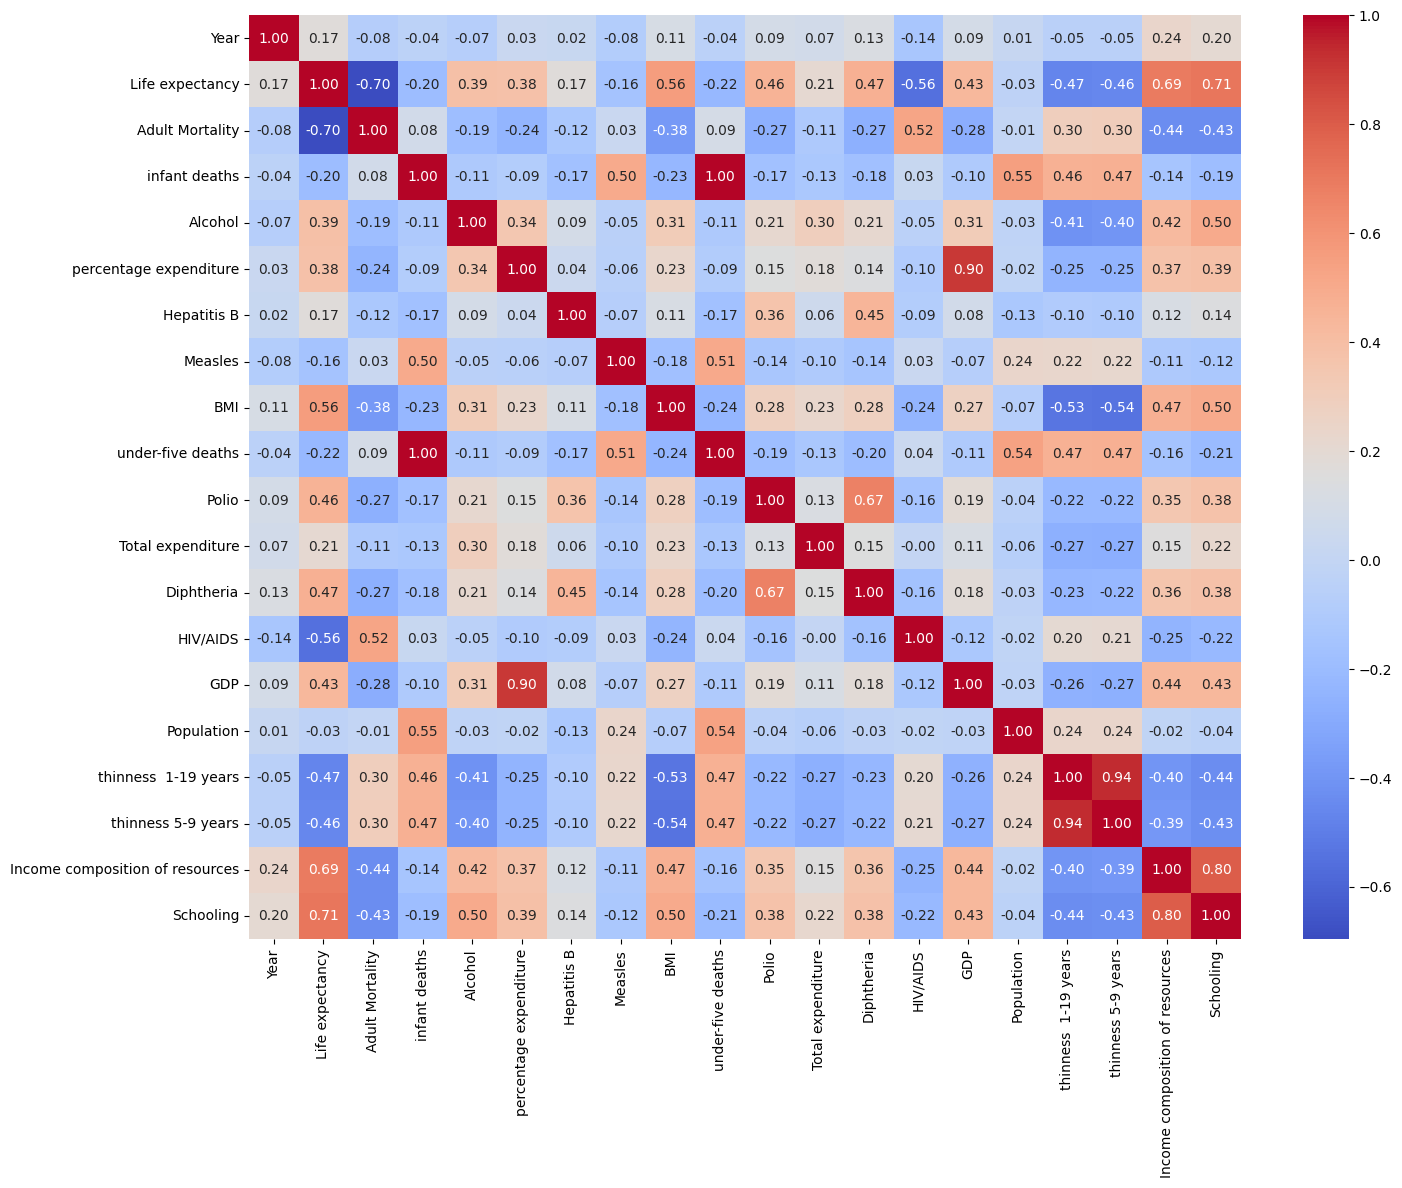

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm")
plt.show()

Splitting the data set

In [20]:
Y = pd.DataFrame(data['Life expectancy'], columns = ['Life expectancy'])
Y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [22]:
data.drop(['Life expectancy'], inplace = True, axis = 1)

In [23]:
all_data = pd.concat([data, country_dummy, status_dummy], axis = 1)
all_data.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developing
0,2015.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,False,False,False,False,False,False,False,False,False,True


In [24]:
X_train, X_test, y_train, y_test = train_test_split(all_data, Y, test_size = 0.2, random_state = 0)

y_test.columns = ['y_test']

Feature selection

In [25]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfecv = RFECV(estimator=rf)
rfecv = rfecv.fit(X_train, y_train.values.ravel())

In [26]:
best_features = X_train.columns[rfecv.support_]

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', best_features)

Optimal number of features : 205
Best features : Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe', 'Developing'],
      dtype='object', length=205)


Updation of X_train and X_test features

In [27]:
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

Random Forest Regression model

In [28]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# Reshaping y_train to a one-dimensional array
y_train_reshaped = y_train.values.ravel()

rf_regressor.fit(X_train_selected, y_train_reshaped)
y_pred_rf = rf_regressor.predict(X_test_selected)
r2_random_forest = r2_score(y_test, y_pred_rf)
print(f"R2 Score for Random Forest: {r2_random_forest:.4f}")


R2 Score for Random Forest: 0.9573


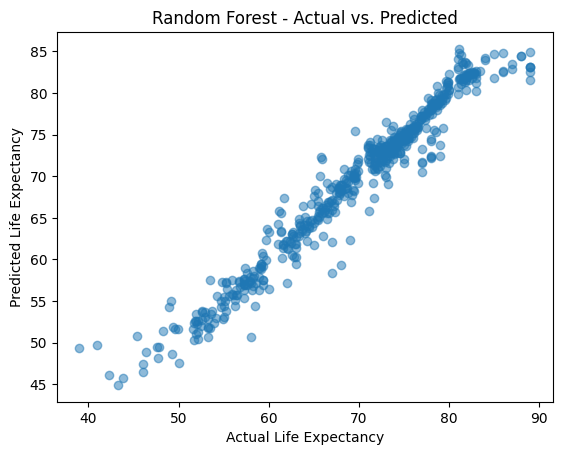

Random Forest R2 Score: 0.9573



In [29]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest - Actual vs. Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()
print(f"Random Forest R2 Score: {r2_random_forest:.4f}\n")

Support Vector Regression (SVR) 

In [30]:
# Support Vector Regression
sc_X, sc_y = StandardScaler(), StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train_selected)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_svr = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test_selected)).reshape(-1, 1))
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R2 Score for SVR: {r2_svr:.4f}")

R2 Score for SVR: 0.9533


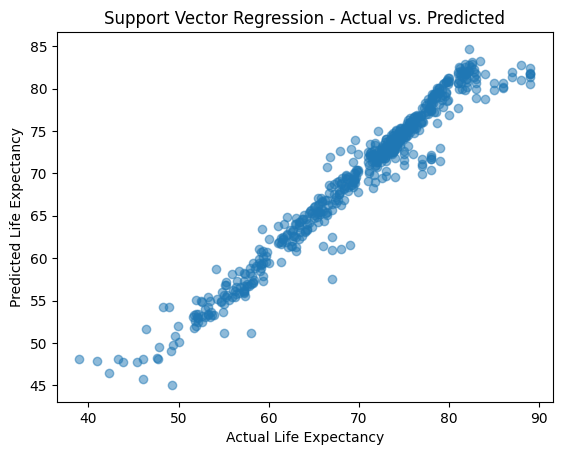

Support Vector Regression R2 Score: 0.9533



In [31]:
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Support Vector Regression - Actual vs. Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()
print(f"Support Vector Regression R2 Score: {r2_svr:.4f}\n")

Multiple Linear Regression

In [32]:
# Multiple Linear Regression
sc_X_ml = StandardScaler()
X_train_scaled_ml = sc_X_ml.fit_transform(X_train_selected)
X_test_scaled_ml = sc_X_ml.transform(X_test_selected)
ml_regressor = LinearRegression()
ml_regressor.fit(X_train_scaled_ml, y_train)
y_pred_ml = ml_regressor.predict(X_test_scaled_ml)
r2_ml = r2_score(y_test, y_pred_ml)
print(f"R2 Score for Multiple Linear Regression: {r2_ml:.4f}")

R2 Score for Multiple Linear Regression: 0.9380


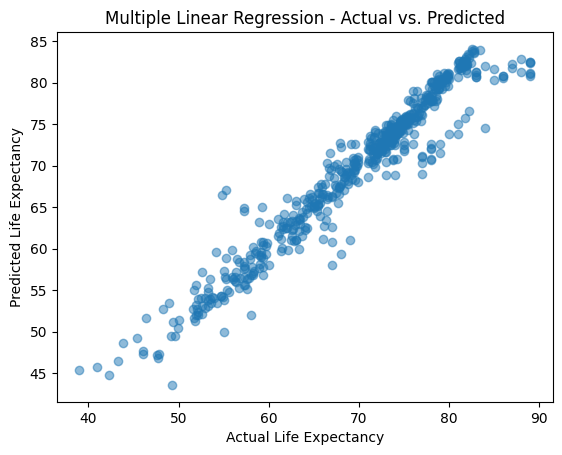

Multiple Linear Regression R2 Score: 0.9380



In [33]:
plt.scatter(y_test, y_pred_ml, alpha=0.5)
plt.title('Multiple Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()
print(f"Multiple Linear Regression R2 Score: {r2_ml:.4f}\n")

Decision Tree

In [34]:
# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train_selected, y_train)
y_pred_dt = dt_regressor.predict(X_test_selected)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R2 Score for Decision Tree: {r2_dt:.4f}")

R2 Score for Decision Tree: 0.9147


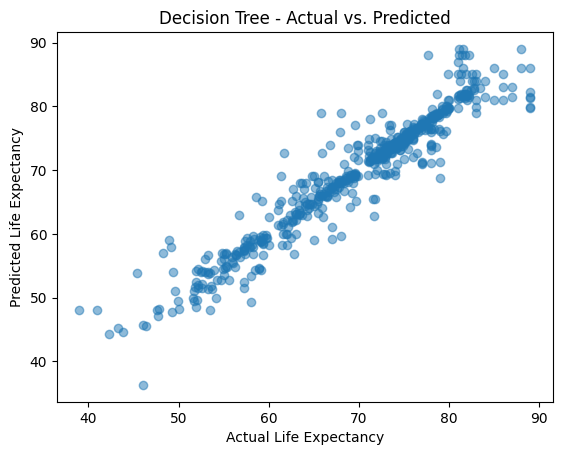

Decision Tree R2 Score: 0.9147



In [35]:
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree - Actual vs. Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()
print(f"Decision Tree R2 Score: {r2_dt:.4f}\n")

Comparision of Models

In [36]:
results = pd.DataFrame({
    'Random Forest': [r2_random_forest],
    'SVM': [r2_svr],
    'Multiple Linear Regression': [r2_ml],
    'Decision Tree': [r2_dt]
})

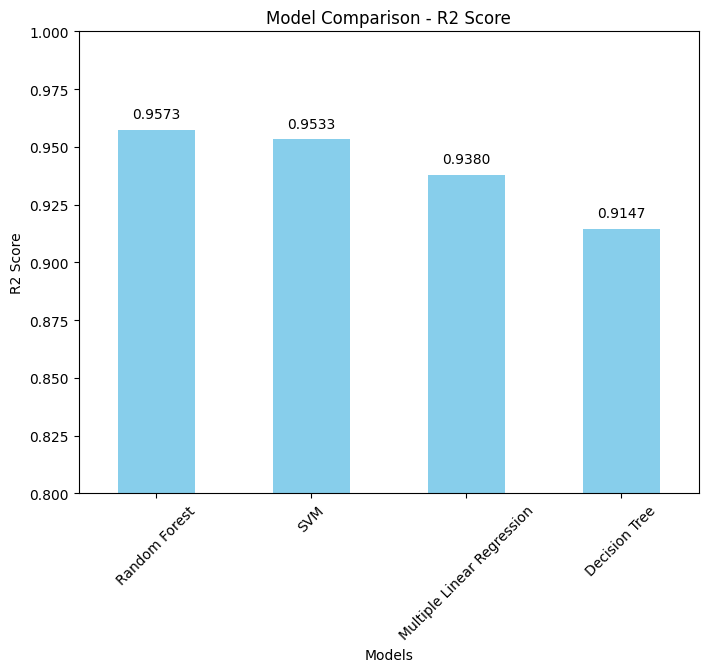

In [37]:
# Transposing the DataFrame for better plotting
results = results.T
results.columns = ['R2 Score']

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']  # Color for each bar
results.plot(kind='bar', figsize=(8, 6), color=colors, legend=False)
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits for a closer look at scores

# Adding the R2 score on top of each bar
for index, value in enumerate(results['R2 Score']):
    plt.text(index, value + 0.005, f'{value:.4f}', ha='center')
